In [ ]:
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#Read image data
def read_image(data_dir,filepath):
    return cv2.imread(os.path.join(data_dir, filepath))

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size,
                      interpolation=cv2.INTER_AREA)



In [ ]:
image_array_data = []
image_label = []

In [ ]:
# Define the path to your directory
directory_path = '/content/drive/My Drive/COVID_DETECT/'
def img_list_return(directory_path,cls_name):
  global image_array_data
  global image_label

  IMAGE_SIZE = 64

  # List all files in the directory
  file_folder = os.path.join(directory_path,cls_name,"images")
  files = os.listdir(file_folder)


  # Print the list of files
  for file in files:
      img_data = read_image(file_folder,file)
      img_data = resize_image(img_data, (IMAGE_SIZE, IMAGE_SIZE))
      img_data = img_data/255
      image_array_data.append(img_data)
      image_label.append(cls_name.lower())

  return image_array_data,image_label


In [ ]:
cls_name = "COVID-19"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [ ]:
cls_name = "Non-COVID"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [ ]:
cls_name = "Normal"
image_array_data,image_label = img_list_return(directory_path,cls_name)

In [ ]:
image_array_data[0]

array([[[0.05490196, 0.05490196, 0.05490196],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.02745098, 0.02745098, 0.02745098]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.21568627, 0.21568627, 0.21568627],
        [0.07843137, 0.07843137, 0.07843137],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.00392157, 0.00392157, 0.00392157],
        [0.01960784, 0.01960784, 0.01960784]],

       ...,

       [[0.10196078, 0.10196078, 0.10196078],
        [0.18039216, 0.18039216, 0.18039216],
        [0.26666667, 0

In [ ]:

X = np.array(image_array_data)


In [ ]:
mapping = {"covid-19": 2, "normal": 0,"non-covid":1}
# Map list values to numerical values
labels = [mapping[value] for value in image_label]

In [ ]:
y = np.array(labels)

In [ ]:
# Display the shape of the data
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (4333, 64, 64, 3)
Shape of y: (4333,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
109/109 [==============================] - 18s 164ms/step - loss: 0.4652 - accuracy: 0.8203
Epoch 2/10
109/109 [==============================] - 21s 189ms/step - loss: 0.4221 - accuracy: 0.8355
Epoch 3/10
109/109 [==============================] - 19s 177ms/step - loss: 0.3510 - accuracy: 0.8745
Epoch 4/10
109/109 [==============================] - 19s 171ms/step - loss: 0.3219 - accuracy: 0.8762
Epoch 5/10
109/109 [==============================] - 19s 171ms/step - loss: 0.2649 - accuracy: 0.8990
Epoch 6/10
109/109 [==============================] - 18s 164ms/step - loss: 0.2361 - accuracy: 0.9132
Epoch 7/10
109/109 [==============================] - 18s 164ms/step - loss: 0.1985 - accuracy: 0.9233
Epoch 8/10
109/109 [==============================] - 19s 177ms/step - loss: 0.1426 - accuracy: 0.9489
Epoch 9/10
109/109 [==============================] - 19s 174ms/step - loss: 0.1140 - accuracy: 0.9639
Epoch 10/10
109/109 [==============================] - 18s 164ms/step - l

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

28/28 [==============================] - 2s 39ms/step - loss: 0.5580 - accuracy: 0.8224
Test loss: 0.5580118894577026
Test accuracy: 0.822376012802124


In [ ]:
y_pred_prob = model.predict(X_test)

# Predict class labels for the test set
y_pred = (y_pred_prob > 0.5).astype(int)

28/28 [==============================] - 3s 92ms/step


In [ ]:
auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')
print(f'AUC: {auc}')



AUC: 0.9443360027065072


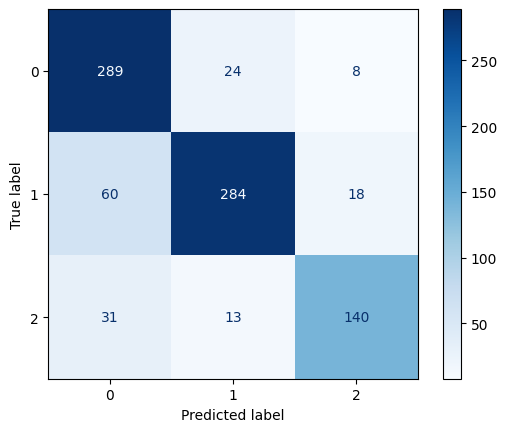

In [ ]:
# Predict the class labels for the test set
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model.save('covid_cnn_model.h5')

In [ ]:
image_size = (64,64)
img_data = cv2.imread("/content/covid.png")
img_data = cv2.resize(img_data.copy(), image_size,interpolation=cv2.INTER_AREA)
img_data = img_data/255

In [ ]:
res = model.predict(np.array([img_data]))

In [ ]:
class_id = np.argmax(res[0])